<a href="https://colab.research.google.com/github/a-nagar/vistra-beginner/blob/main/Python_Begin_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Classification Model

We will use the US-pumpkins dataset which includes 1757 lines of data about the market for pumpkins, sorted into groupings by city. This is raw data extracted from the Specialty Crops Terminal Markets Standard Reports distributed by the United States Department of Agriculture.

In [ ]:
import pandas as pd
pumpkins = pd.read_csv('https://an-utd-python.s3.us-west-1.amazonaws.com/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [ ]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

We are going to try to predict the color class using Logistic Regression method.

In [ ]:
pumpkins['Color'].value_counts()

ORANGE     916
WHITE      213
STRIPED     12
Name: Color, dtype: int64

Let's convert the categorical data into labels. Luckily, sklearn has a method for this called LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)


new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

In [ ]:
new_pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,1,3,4,3,3,0
3,1,3,4,17,3,0
4,1,3,4,5,2,0
5,1,3,4,5,2,0
6,1,4,4,5,3,0


In [ ]:
new_pumpkins['Color'].value_counts()

0    835
1    156
Name: Color, dtype: int64

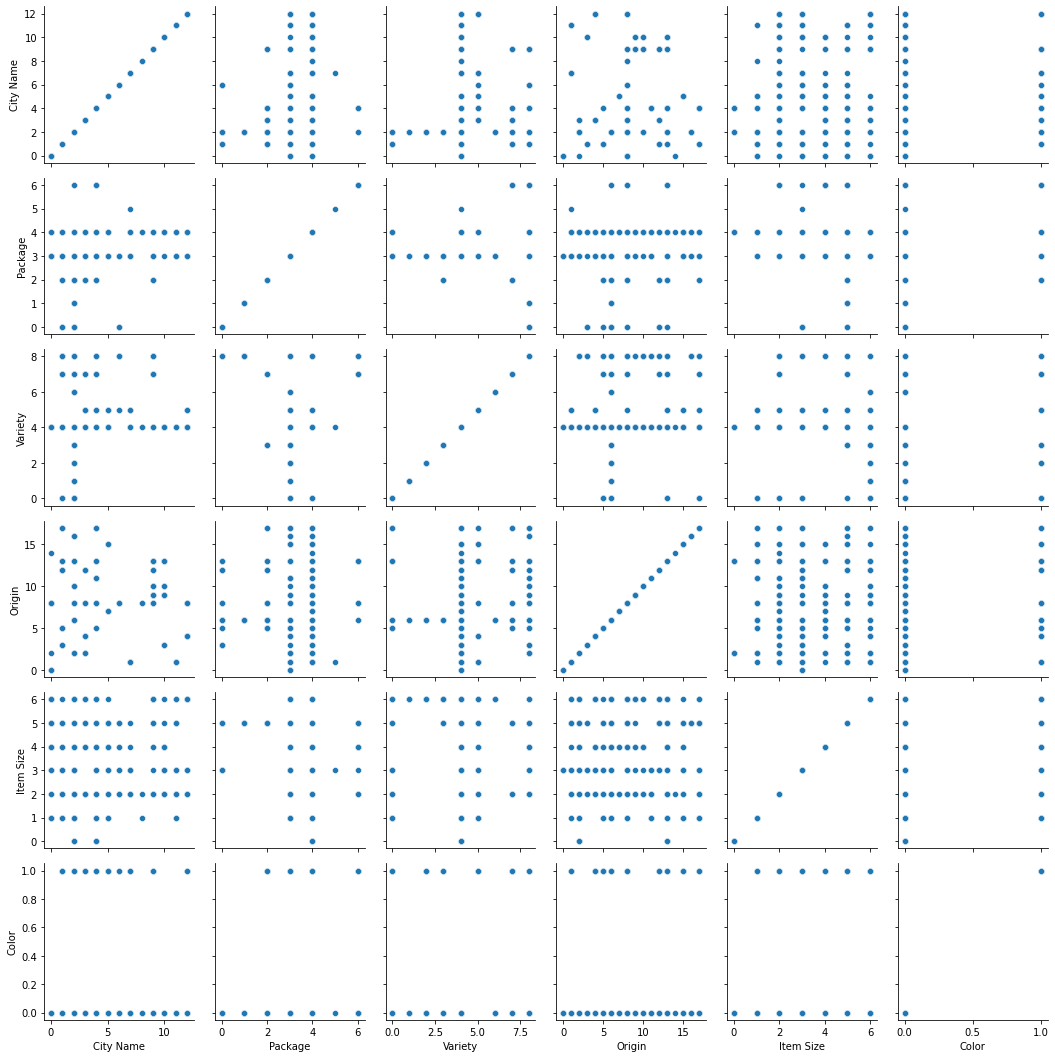

In [ ]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


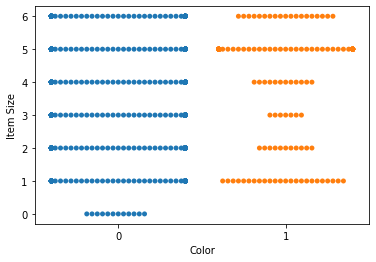

In [ ]:
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

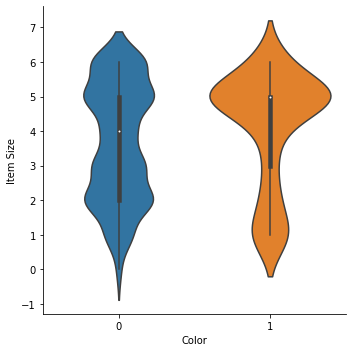

In [ ]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

In [ ]:
new_pumpkins[new_pumpkins['Variety'] == 4]

,City Name,Package,Variety,Origin,Item Size,Color
2,1,3,4,3,3,0
3,1,3,4,17,3,0
4,1,3,4,5,2,0
5,1,3,4,5,2,0
6,1,4,4,5,3,0
...,...,...,...,...,...,...
1689,12,4,4,4,2,0
1690,12,4,4,4,3,0
1691,12,4,4,8,6,0
1692,12,4,4,8,2,0


In [ ]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]  # predictors, independent variables, attributes, features
y = new_pumpkins['Color'] # predicted variable, outcome variable, target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# no guarantee that train and test parts will keep same ratio of orange and white pumpkins
# if you want to ensure balanced class data in each part, stratified sampling

In [ ]:
X.shape

(991, 5)

In [ ]:
X_train.shape

(891, 5)

In [ ]:
X_test.shape

(100, 5)

[Text(0.39285714285714285, 0.9166666666666666, 'X[2] <= 4.5\ngini = 0.266\nsamples = 891\nvalue = [750, 141]'),
 Text(0.21428571428571427, 0.75, 'X[2] <= 3.5\ngini = 0.079\nsamples = 560\nvalue = [537, 23]'),
 Text(0.14285714285714285, 0.5833333333333334, 'X[3] <= 1.5\ngini = 0.441\nsamples = 70\nvalue = [47, 23]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.21428571428571427, 0.4166666666666667, 'X[2] <= 1.5\ngini = 0.289\nsamples = 57\nvalue = [47, 10]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.2857142857142857, 0.25, 'X[4] <= 2.5\ngini = 0.486\nsamples = 24\nvalue = [14, 10]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.35714285714285715, 0.08333333333333333, 'gini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2857142857142857, 0.5833333333333334, 'gini = 0.0\nsamples = 490\nvalue = [490, 0]'),
 Text(0.5714285714285714, 

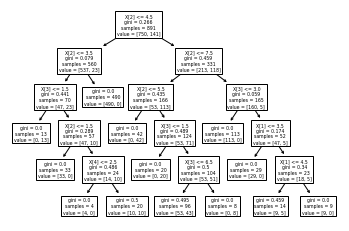

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
predictions = clf.predict(X_test)

print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)

print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        85
           1       1.00      0.67      0.80        15

    accuracy                           0.95       100
   macro avg       0.97      0.83      0.89       100
weighted avg       0.95      0.95      0.95       100

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
Accuracy:  0.95


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X.columns

Index(['Origin', 'Item Size', 'Variety', 'City Name', 'Package'], dtype='object')

In [ ]:
y.unique()

array([0, 1])

In [ ]:
colors =  ["ORANGE", "WHITE"]

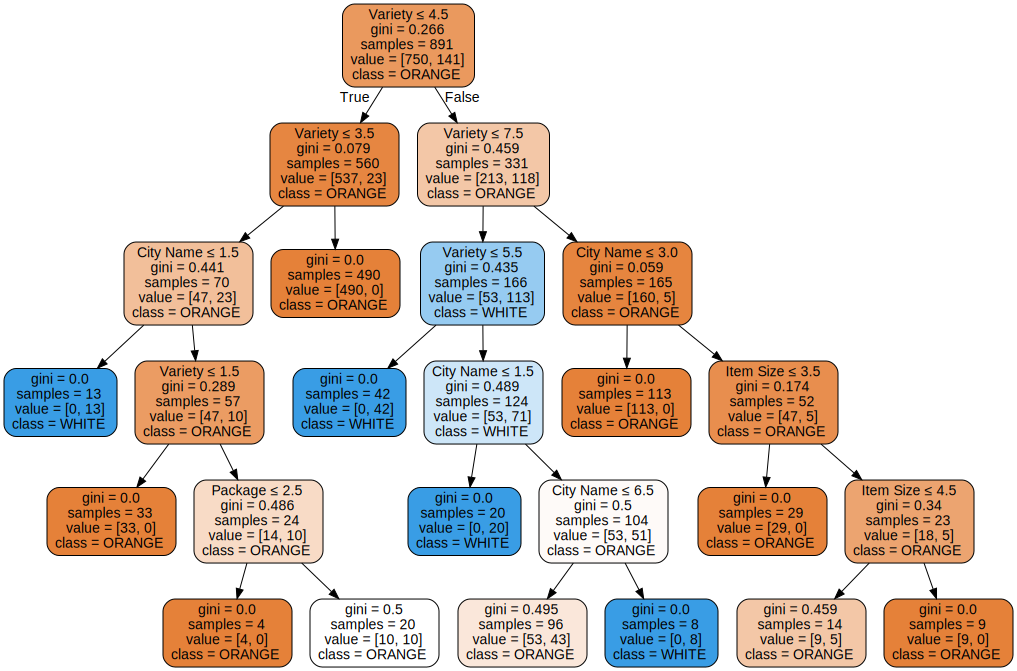

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=colors,  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Application on Cuisines Dataset

In [ ]:
import pandas as pd
cuisines_df = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [ ]:
cuisines_label_df.value_counts()

indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64

In [ ]:
type(cuisines_label_df)

pandas.core.series.Series

In [ ]:
cuisine_labels_distinct = cuisines_label_df.unique()

In [ ]:
cuisine_labels_distinct

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [ ]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

[Text(0.4973958333333333, 0.9166666666666666, 'X[112] <= 0.5\ngini = 0.8\nsamples = 2796\nvalue = [537, 566, 565, 559, 569]'),
 Text(0.2916666666666667, 0.75, 'X[290] <= 0.5\ngini = 0.786\nsamples = 2311\nvalue = [534, 236, 563, 557, 421]'),
 Text(0.16666666666666666, 0.5833333333333334, 'X[185] <= 0.5\ngini = 0.786\nsamples = 2144\nvalue = [530, 236, 561, 397, 420]'),
 Text(0.08333333333333333, 0.4166666666666667, 'X[334] <= 0.5\ngini = 0.78\nsamples = 2000\nvalue = [526, 224, 551, 397, 302]'),
 Text(0.041666666666666664, 0.25, 'X[68] <= 0.5\ngini = 0.783\nsamples = 1787\nvalue = [368, 223, 538, 366, 292]'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.753\nsamples = 1371\nvalue = [310, 142, 518, 196, 205]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.73\nsamples = 416\nvalue = [58, 81, 20, 170, 87]'),
 Text(0.125, 0.25, 'X[95] <= 0.5\ngini = 0.423\nsamples = 213\nvalue = [158, 1, 13, 31, 10]'),
 Text(0.10416666666666667, 0.08333333333333333, 'gini = 0.391\nsamples = 2

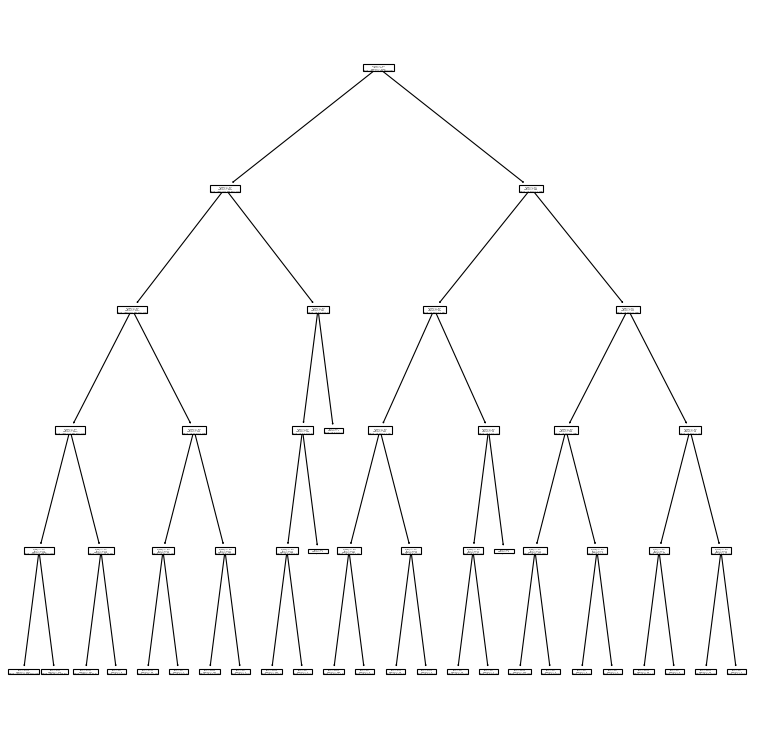

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=80)
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

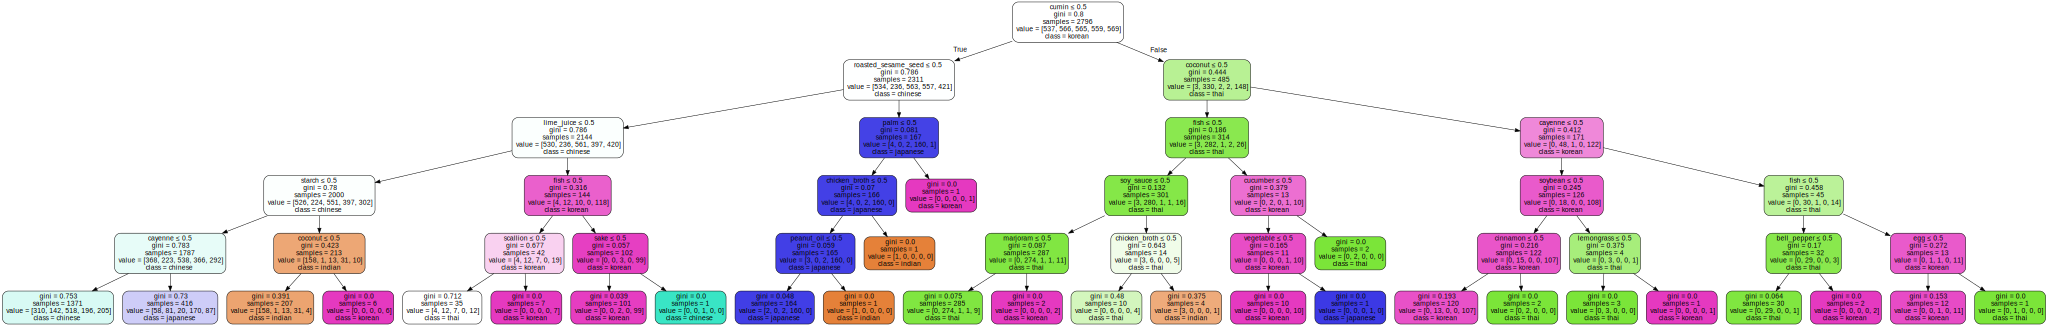

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=cuisines_feature_df.columns,  
                     class_names=cuisine_labels_distinct,  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.82      0.31      0.44       262
      indian       0.81      0.57      0.67       233
    japanese       0.37      0.88      0.52       234
      korean       0.58      0.60      0.59       240
        thai       0.83      0.44      0.58       230

    accuracy                           0.55      1199
   macro avg       0.68      0.56      0.56      1199
weighted avg       0.68      0.55      0.56      1199



In [ ]:
rf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.82      0.47      0.60       262
      indian       0.76      0.84      0.80       233
    japanese       0.47      0.81      0.59       234
      korean       0.76      0.69      0.72       240
        thai       0.83      0.60      0.69       230

    accuracy                           0.68      1199
   macro avg       0.72      0.68      0.68      1199
weighted avg       0.73      0.68      0.68      1199



In [ ]:
cars = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/auto-mpg.csv")

In [ ]:
X = cars[['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'size']]

In [ ]:
y = cars['origin']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)

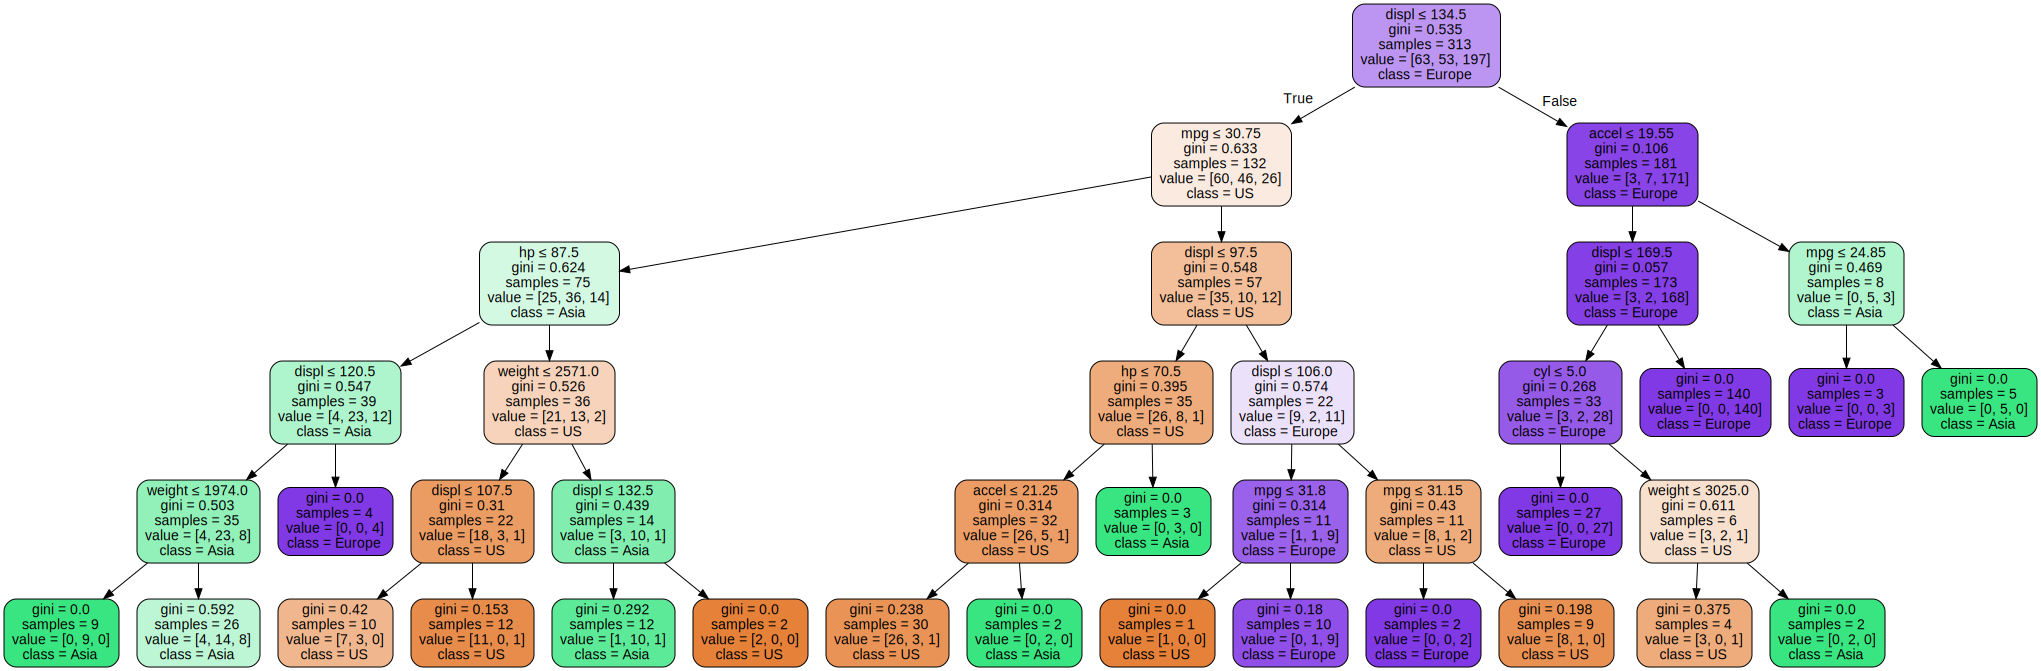

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=y.unique(),  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Asia       0.74      0.88      0.80        16
      Europe       0.60      0.60      0.60        15
          US       0.91      0.85      0.88        48

    accuracy                           0.81        79
   macro avg       0.75      0.78      0.76        79
weighted avg       0.82      0.81      0.81        79

